## Recommendation system based on Popularity and Collobarative filtering methods.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from surprise import Dataset,Reader
from surprise import KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Loading data
ratings = pd.read_csv("ratings_Electronics.csv")
ratings.columns = ['userId', 'productId', 'ratings', 'timestamp']

In [3]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 4 columns):
userId       object
productId    object
ratings      float64
timestamp    int64
dtypes: float64(1), int64(1), object(2)
memory usage: 238.8+ MB


* There are a total of 7824481 numbers of records available and the file size is too large.
* There are no null values of missing values as per the info function
* There are two numeric and two non numeric columns. Of the two numeric columns one is timestamp which is ignored as per instructions
* The ratings are from 1 to 5

In [4]:
# Ignoring the timestamp column as per the current requirement
ratings.drop('timestamp', axis=1, inplace=True)

In [5]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7824481 entries, 0 to 7824480
Data columns (total 3 columns):
userId       object
productId    object
ratings      float64
dtypes: float64(1), object(2)
memory usage: 179.1+ MB


In [6]:
ratings.sample(10)

,userId,productId,ratings
6860572,A24BM3UT02WRPW,B00AANQLRI,5.0
2649864,ATI0922DE3HAN,B002JIEGWY,2.0
7374885,A2L12B46ANQVBK,B00D9KP70G,5.0
6542644,ARM6HQBVJDTXX,B0098Y77N2,5.0
6367356,AEHWV0P63GZR7,B008THTOKS,5.0
7075257,A3C3JN219NIQVS,B00BCHHZGW,5.0
172149,A2MOVLZ429BFLZ,B00006B820,3.0
2108599,A32ZVXVJFK94XS,B001KSJCVY,5.0
5167442,A18NGP0QR5MKM4,B005S0BYQ6,5.0
5384293,A2G7XM6LWR1A5D,B006GWO5WK,5.0


In [7]:
# checking for missing values
ratings.isna().sum()

userId       0
productId    0
ratings      0
dtype: int64

#### No missing values found

In [8]:
ratings['ratings'].unique()

array([5., 1., 3., 2., 4.])

Ratings range from 1 to 5

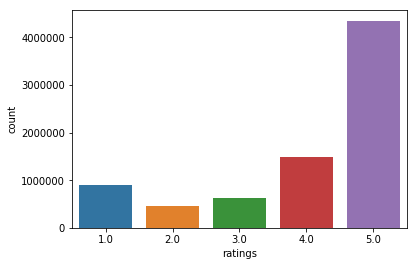

In [9]:
sns.countplot(data=ratings , x='ratings')

* More than half of the dataset have been highly rated


In [10]:
users_cnts = ratings['userId'].value_counts()
users_cnts

A5JLAU2ARJ0BO     520
ADLVFFE4VBT8      501
A3OXHLG6DIBRW8    498
A6FIAB28IS79      431
A680RUE1FDO8B     406
A1ODOGXEYECQQ8    380
A36K2N527TXXJN    314
A2AY4YUOX2N1BQ    311
AWPODHOB4GFWL     308
A25C2M3QF9G7OQ    296
ARBKYIVNYWK3C     296
A22CW0ZHY3NJH8    292
A3EXWV8FNSSFL6    282
A38RMU1Y5TDP9     282
A3LGT6UZL99IW1    279
A2NOW4U7W3F7RI    277
A23GFTVIETX7DS    270
A3PD8JD9L4WEII    266
A17BUUBOU0598B    261
A3AYSYSLHU26U9    257
A2XRMQA6PJ5ZJ8    253
A231WM2Z2JL0U3    252
A12DQZKRKTNF5E    252
A1UQBFCERIP7VJ    247
AGVWTYW0ULXHT     244
A203OCQQ12MAVT    240
AEJAGHLC675A7     239
A2NYK9KWFMJV4Y    238
A3A4ZAIBQWKOZS    236
A3CW0ZLUO5X2B1    227
                 ... 
A2ONQGY94YFHB6      1
A2G0D1Z8D2NE14      1
ADFZJ0YEZBY5J       1
ARHH1EIOTQQGV       1
A1076JYIVAYP3D      1
A1LBKY4COT6Z9I      1
A1RM9M92EHTCTJ      1
A2MPV0TNE8QBYA      1
A2YVUMOZUGONSP      1
A1IZTAGVQP885O      1
A83YUFEGJ9IHV       1
A1H4GL7VSF5BNP      1
A38N6UL2Y1L3QR      1
A1SO4NNFQT4F1Q      1
A360EBGKPU

Maximum number of times an user has rated a product stands at 520 while the least stands at 1.
Considering the users who have atleast rated 50 products and removing the other datas

In [11]:
# considering only users who rated over 50 products
ratings_data = ratings[ratings['userId'].map(ratings['userId'].value_counts()) > 49]
ratings_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125871 entries, 93 to 7824443
Data columns (total 3 columns):
userId       125871 non-null object
productId    125871 non-null object
ratings      125871 non-null float64
dtypes: float64(1), object(2)
memory usage: 3.8+ MB


## Collobarative filtering method

Considering only 10 % of the data for building the model as the memory error occurs. 

In [12]:
# rating scale for 1 to 5
reader = Reader(rating_scale=(1, 5))

# considering 10 % of data due to memory error
data_for_model = ratings_data.head(int(len(ratings_data)*(10/100)))

# trainset.to_inner_iid('002542730X')`

In [13]:
data_for_model.sample(10)

,userId,productId,ratings
174132,A3GX0FAMEXV6FB,B00006B92A,3.0
316347,A2N75ADJSRW0AH,B0000AG92S,4.0
113935,A1PN2U0AWXGVML,B00005OUJW,4.0
533854,A2L42QEWR77PKZ,B00061UISM,5.0
17324,A1522TN5FVJL0Y,B00000JMUC,5.0
50580,A2BGZ52M908MJY,B00004TLP9,4.0
273403,A1KD8NJPZ01R37,B000099679,1.0
269449,A2ME89MSWVG9NF,B000094ADV,4.0
328619,A2PC9ZZIFV31B1,B0000BYDKO,3.0
550180,A2Y3WWPUKIJ59I,B00066IJPQ,1.0


In [14]:
data = Dataset.load_from_df(data_for_model[['userId', 'productId', 'ratings']], reader,)

trainset, testset = train_test_split(data, test_size=.3,random_state=7)

In [15]:
algo = KNNWithMeans(k=50, sim_options={'name': 'cosine', 'user_based': False})
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [16]:
res = algo.get_neighbors(trainset.to_inner_iid('B00006HQV5'), k=5)

In [17]:
res

[385, 1237, 1376, 3057, 3842]

In [18]:
[trainset.to_raw_iid(v) for v in res]

['B0000AZK4G', 'B0000932KS', 'B00009XSYV', 'B000067TNE', 'B000234SSU']

In [19]:
test_pred = algo.test(testset)

In [20]:
accuracy.rmse(test_pred)

RMSE: 1.2249


1.2248763135235685

__Popularity based recommendation system__

In [21]:
ratings_data.groupby('productId')['ratings'].mean().head()

productId
0594451647    5.000000
0594481813    3.000000
0970407998    2.500000
0972683275    4.750000
1400501466    3.333333
Name: ratings, dtype: float64

In [22]:
ratings_data.groupby('productId')['ratings'].mean().sort_values(ascending=False).head() 

productId
B00LKG1MC8    5.0
B002QUZM3M    5.0
B002QWNZHU    5.0
B002QXZPFE    5.0
B002R0DWNS    5.0
Name: ratings, dtype: float64

In [23]:
ratings_data.groupby('productId')['ratings'].count().sort_values(ascending=False).head()  

productId
B0088CJT4U    206
B003ES5ZUU    184
B000N99BBC    167
B007WTAJTO    164
B00829TIEK    149
Name: ratings, dtype: int64

In [24]:
ratings_mean_count = pd.DataFrame(ratings_data.groupby('productId')['ratings'].mean()) 

In [25]:
ratings_mean_count['rating_counts'] = pd.DataFrame(ratings_data.groupby('productId')['ratings'].count()) 

In [26]:
ratings_mean_count.head()

,ratings,rating_counts
productId,,
0594451647,5.000000,1
0594481813,3.000000,1
0970407998,2.500000,2
0972683275,4.750000,4
1400501466,3.333333,6
